<a href="https://colab.research.google.com/github/Xavier-ML/Computational-Physics-with-Python/blob/main/10b_Quantum_harmonic_oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum mechanics: Solving the stationary Schrödinger equation

- by Börge Göbel

## A) Quantum harmonic oscillator

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
h=1
m=1

In [9]:
V=0.5

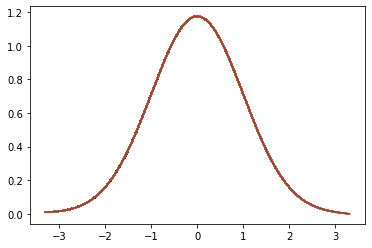

In [10]:
psi=0.01
dpsi=0
dx=0.01

E=0.5

#V*x**2 = E + 10V
a=np.sqrt(10+E/V)
x=-a


xlist=[]
psilist=[]

while x<=a:
    ddpsi=2*m/h**2*(V*x**2-E)*psi
    dpsi=dpsi+ddpsi*dx
    psi=psi+dpsi*dx
    x=x+dx
    xlist.append(x)
    psilist.append(psi)
    plt.plot(xlist,psilist)

0.49999999999999994

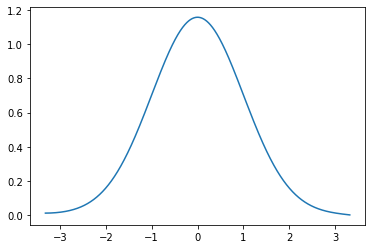

In [12]:
dx=0.001
E=0
psi=1
dE=0.05

while abs(psi)>0.02:
    psi=0.01
    dpsi=0.0
    E=E+dE
    a=np.sqrt(10+E/V)
    x=-a
    xlist=[]
    psilist=[]

    while x<=a:
        ddpsi=2*m/h**2*(V*x**2-E)*psi
        dpsi=dpsi+ddpsi*dx
        psi=psi+dpsi*dx
        x=x+dx
        xlist.append(x)
        psilist.append(psi)
        #print(x,psi)
        #plt.plot(xlist,psilist)
        
plt.plot(xlist,psilist)
E

In [13]:
E=0
psi=1
count=1
xvalues=[]
eigenfunctions=[]
eigenenergies=[]
nmax=10

while count<=nmax:
    psi=1
    while abs(psi)>0.02:
        psi=0.01
        dpsi=0.0
        E=E+0.05
        a=np.sqrt(10+E/V)
        x=-a
        xlist=[]
        psilist=[]

        while x<=a:
            ddpsi=2*m/h**2*(V*x**2-E)*psi
            dpsi=dpsi+ddpsi*dx
            psi=psi+dpsi*dx
            x=x+dx
            xlist.append(x)
            psilist.append(psi)
    
    eigenfunctions.append([psilist])
    eigenenergies.append(E)
    xvalues.append(xlist)
    count=count+1
    E=E*1.1

In [14]:
eigenenergies

[0.49999999999999994,
 1.5000000000000007,
 2.499999999999999,
 3.4999999999999964,
 4.499999999999995,
 5.499999999999993,
 6.499999999999991,
 7.499999999999989,
 8.499999999999993,
 9.499999999999995]

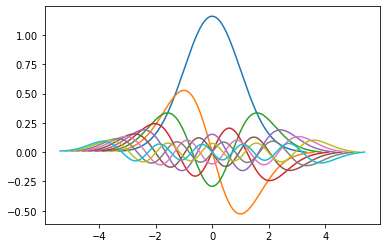

In [15]:
count=1
while count<=nmax:
    plt.plot(xvalues[count-1],eigenfunctions[count-1][0])
    count=count+1

In [16]:
np.dot(eigenfunctions[2][0],eigenfunctions[2][0])*dx

0.30246220871343316

In [17]:
count=1
while count<=nmax:
    norm=np.dot(eigenfunctions[count-1][0],eigenfunctions[count-1][0])*dx
    eigenfunctions[count-1][0][:] = [x / np.sqrt(norm) for x in eigenfunctions[count-1][0]]
    count=count+1

In [18]:
np.dot(eigenfunctions[2][0],eigenfunctions[2][0])*dx

1.0000000000000004

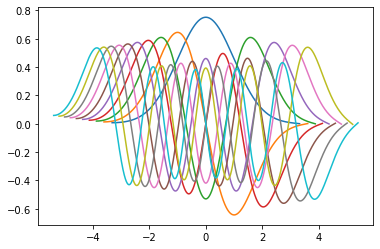

In [19]:
count=1
while count<=nmax:
    plt.plot(xvalues[count-1],eigenfunctions[count-1][0])
    count=count+1

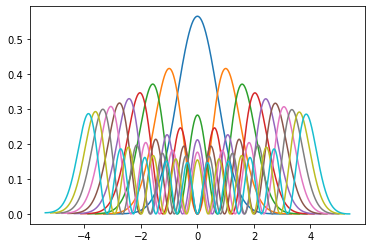

In [20]:
count=1
while count<=nmax:
    plt.plot(xvalues[count-1],np.square(eigenfunctions[count-1][0]))
    count=count+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


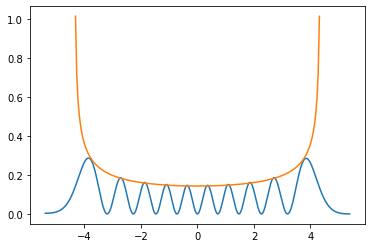

In [21]:
# QM probability
plt.plot(xvalues[nmax-1],np.square(eigenfunctions[nmax-1][0]))

# classical probability p(x)=|1/v(x)|
# x(t)=cos(t) or t(x)=arccos(x) --> v(t)=-sin(t) or v(x)=-sin(arccos(x))
# p(x)=1/sin(arccos(x)) = 1/sqrt(1-x**2)

x1=np.arange(-1,1,1/100)
plt.plot(x1*np.sqrt(eigenenergies[nmax-1]/V),1/np.sqrt(1-x1**2)/7)

In [22]:
count=1
while count<=nmax:
    eigenfunctions[count-1][0][:] = [x + eigenenergies[count-1] for x in eigenfunctions[count-1][0]]
    count=count+1

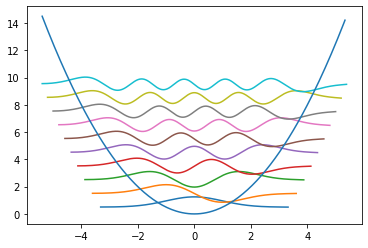

In [23]:
count=1
while count<=nmax:
    plt.plot(xvalues[count-1],eigenfunctions[count-1][0])
    count=count+1
    
x1=np.arange(-a,a,a/100)
plt.plot(x1,V*x1**2)